# Single-layer neural network

In [38]:
from IPython.display import Image
import matplotlib as plt
%matplotlib inline

In [22]:
# 붓꽃 자료 가져오기 

import pandas as pd
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [23]:
# 0: 꽃받침 길이(SepalLength), 1: 꽃받침의 폭(SepalWidth), 2: 꽃잎의 길이(PetalLength), 3: 꽃잎의 너비(PetalWidth), 4: 꽃 이름
# 첫 50개: Iris-setosa, 중간 50개: Iris-vericolor, 마지막 50개: Iris-virginica

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

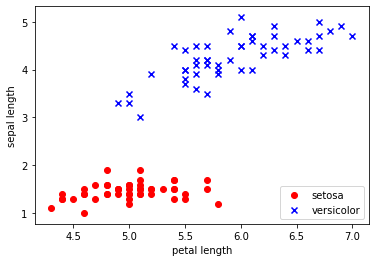

In [25]:
import matplotlib.pyplot as plt
import numpy as np
y=df.iloc[0:100, 4].values
y=np.where(y=='Iris-setosa', -1, 1)
X=df.iloc[0:100, [0,2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='lower right')
plt.show()

**Perceptron**


McCullock and Walter Pitts (MCP) neuron (*A Logical Calculus of the Ideas Immanent in Nervous Activity*, 1943, *The bulletin of mathematical biophysics* ,5(4), 115-133)

Frank Rosenblatt(*The Perceptron, a Perceiving and Recognizing Automation*, 1957)

Activation function: Heaviside step function
$$\phi(z)=\left\{\begin{array}{cc}1, &if \; z\geq \theta,\\-1,& otherwise.\end{array}\right.$$

Perceptron rule is summarized by the following steps

Step 1. Initialize the weights to 0 or small random numbers

Step 2. For each training sample $x^{(i)}$ perform the following steps:
    
   1. Compute the output value $\hat{y}$.
        
   2. Update the weights.
        
        $$w_j:=w_j+\Delta w_j,$$
        where
        $$\Delta w_j=\eta\left(y^{(i)}-\hat{y}^{(i)}\right)x_j^{(i)}.$$
        
 Note that all weights in the weight vector are being updated simultaneously. Moreover, the convergence of the perceptron is only guaranteed if the two classes are linearly separable and learning rate is sufficiently small.


In [26]:
# perceptron class 

import numpy as np

class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=10) :
        self.eta=eta
        self.n_iter=n_iter
        
    def fit(self, X, y) :  # X, y는 각각 100 행을 갖는 array (100개 샘플)
        """
        Fitting training data
        
        Parameters
        X: shape=[n_sample, n_features] training vectors
        Y: Target values
        
        Return
        self: object
        """
        
        self.w_=np.zeros(1+X.shape[1]) # 1은 편향(bias), X.shape[1] 은 feature의 개수
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors=0
            for xi, target in zip(X,y):
                update=self.eta*(target-self.predict(xi))
                self.w_[1:] += update*xi  # 하나의 feature 에 대한 가중치 업데이트
                self.w_[0] += update      # 편향에 대한 가중치 업데이트
                errors += int(update !=0.0)
            self.errors_.append(errors)
        return self
            
        
    def net_input(self, X):
        "calculate net input"
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        "return class label after unit step"
        return np.where(self.net_input(X) >=0, 1, -1)

In [27]:
# 붓꽃 데이터를 퍼셉트론으로 분류하기

import pandas as pd
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y=df.iloc[0:100, 4].values
y=np.where(y=='Iris-setosa', -1, 1)
X=df.iloc[0:100, [0,2]].values

In [28]:
ppn=Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)


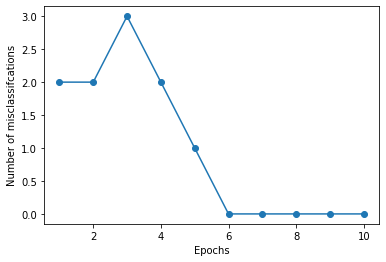

In [29]:
# 분류 확인하기

plt.plot(range(1,len(ppn.errors_) + 1), ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifcations')
plt.show()

In [30]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier, resolution=0.02):
    #setup marker generater and color map
    markers=('s','x','o','^','v')
    colors =('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min, x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y ==cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


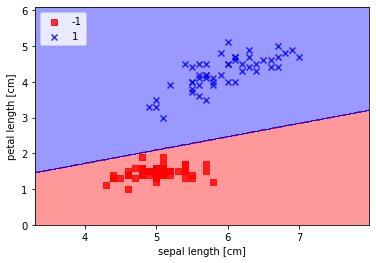

In [31]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()